# PROJECT UJIAN TENGAH SEMESTER DATA MINING & BUSINESS ANALYTICS - STATISTIKA DAN SAINS DATA

Created by: <br><br>
_Muhamad Abdul Qodir Dani_ <br><br>
_2304220016_ <br><br>
_17 April 2025_ <br><br>
_STATISTIKA DAN SAINS DATA UNIVERSITAS NEGERI SEMARANG_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("D:/Portofolio/CLASIFICATION PROJECT TITANIC/titanic_data.csv")

In [4]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
884,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
885,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
886,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
888,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
len(data)

889

### ***1. Eksplorasi Awal***

##### **a. Berapa Jumlah total penumpang yang ada?**

In [6]:
total_passengers = len(data)
print("Jumlah Total Penumpang:", total_passengers)

Jumlah Total Penumpang: 889


##### **b. Berapa jumlah penumpang yang selamat dan tidak selamat?**

Survived: 342
Not Survived: 547


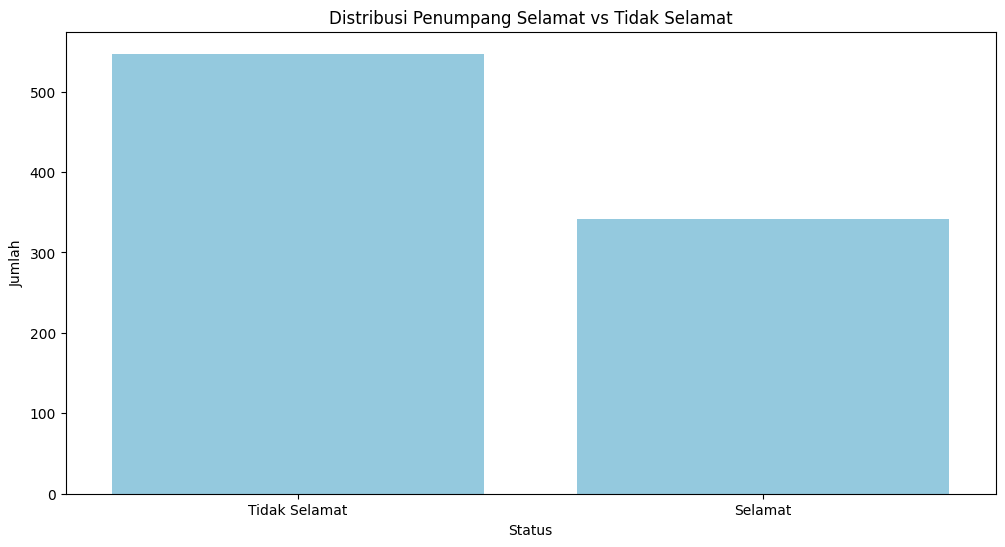

In [7]:
survival_counts = data['survived'].value_counts()
survived = survival_counts[1]
not_survived = survival_counts[0]
print("Survived:", survived)
print("Not Survived:", not_survived)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.countplot(x='survived', data=data, color='skyblue')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.title('Distribusi Penumpang Selamat vs Tidak Selamat')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

##### **c. Berapa rata-rata umur penumpang? dan siapa penumpang termuda dan tertua?**

In [8]:
rata2_umur = data['age'].mean()
penumpang_termuda = data[data['age'] == data['age'].min()]
penumpang_tertua = data[data['age'] == data['age'].max()]

print(f"Rata-rata umur penumpang: {rata2_umur:.2f} tahun")
print("Penumpang termuda:")
print(penumpang_termuda[['age', 'who']])
print("Penumpang tertua:")
print(penumpang_tertua[['age', 'who']])

Rata-rata umur penumpang: 29.70 tahun
Penumpang termuda:
      age    who
801  0.42  child
Penumpang tertua:
      age  who
628  80.0  man


##### **d. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualkan**

jumlah penumpang kelas 1: 216
jumlah penumpang kelas 2: 184
jumlah penumpang kelas 3: 489
Persentase penumpang kelas 1: 24.30%


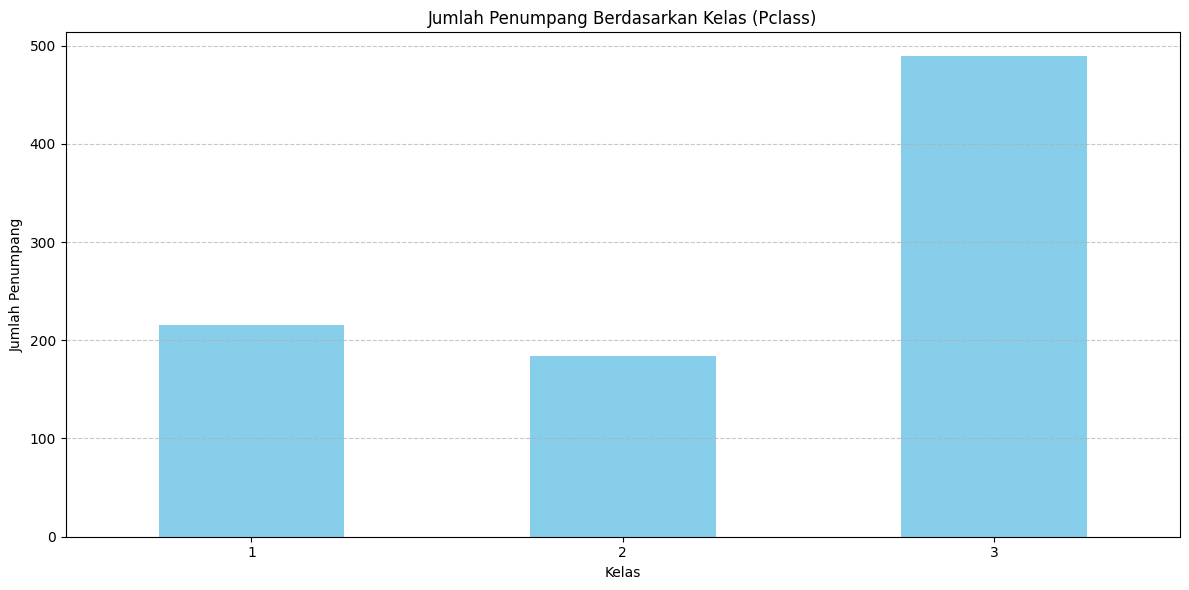

In [9]:
pclass_counts = data['pclass'].value_counts().sort_index()
percent_class_1 = (pclass_counts[1] / total_passengers) * 100
print("jumlah penumpang kelas 1:", pclass_counts[1])
print("jumlah penumpang kelas 2:", pclass_counts[2])   
print("jumlah penumpang kelas 3:", pclass_counts[3])
print(f"Persentase penumpang kelas 1: {percent_class_1:.2f}%")

# Visualisasi jumlah penumpang berdasarkan kelas
plt.figure(figsize=(12, 6))
pclass_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penumpang Berdasarkan Kelas (Pclass)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Kesimpulan Eksplorasi Data

In [10]:
{
    "Total Penumpang": total_passengers,
    "Jumlah Selamat": survived,
    "Jumlah Tidak Selamat": not_survived,
    "Rata-rata Umur": round(rata2_umur, 2),
    "Penumpang Termuda": {
        "Nama": penumpang_termuda['who'],
        "Umur": penumpang_termuda['age']
    },
    "Penumpang Tertua": {
        "Nama": penumpang_tertua['who'],
        "Umur": penumpang_tertua['age']
    },
    "Jumlah per Kelas": pclass_counts.to_dict(),
    "Persentase Kelas 1": round(percent_class_1, 2)
}

{'Total Penumpang': 889,
 'Jumlah Selamat': 342,
 'Jumlah Tidak Selamat': 547,
 'Rata-rata Umur': 29.7,
 'Penumpang Termuda': {'Nama': 801    child
  Name: who, dtype: object,
  'Umur': 801    0.42
  Name: age, dtype: float64},
 'Penumpang Tertua': {'Nama': 628    man
  Name: who, dtype: object,
  'Umur': 628    80.0
  Name: age, dtype: float64},
 'Jumlah per Kelas': {1: 216, 2: 184, 3: 489},
 'Persentase Kelas 1': 24.3}

Mengeksplor Grafik Sebaran Data

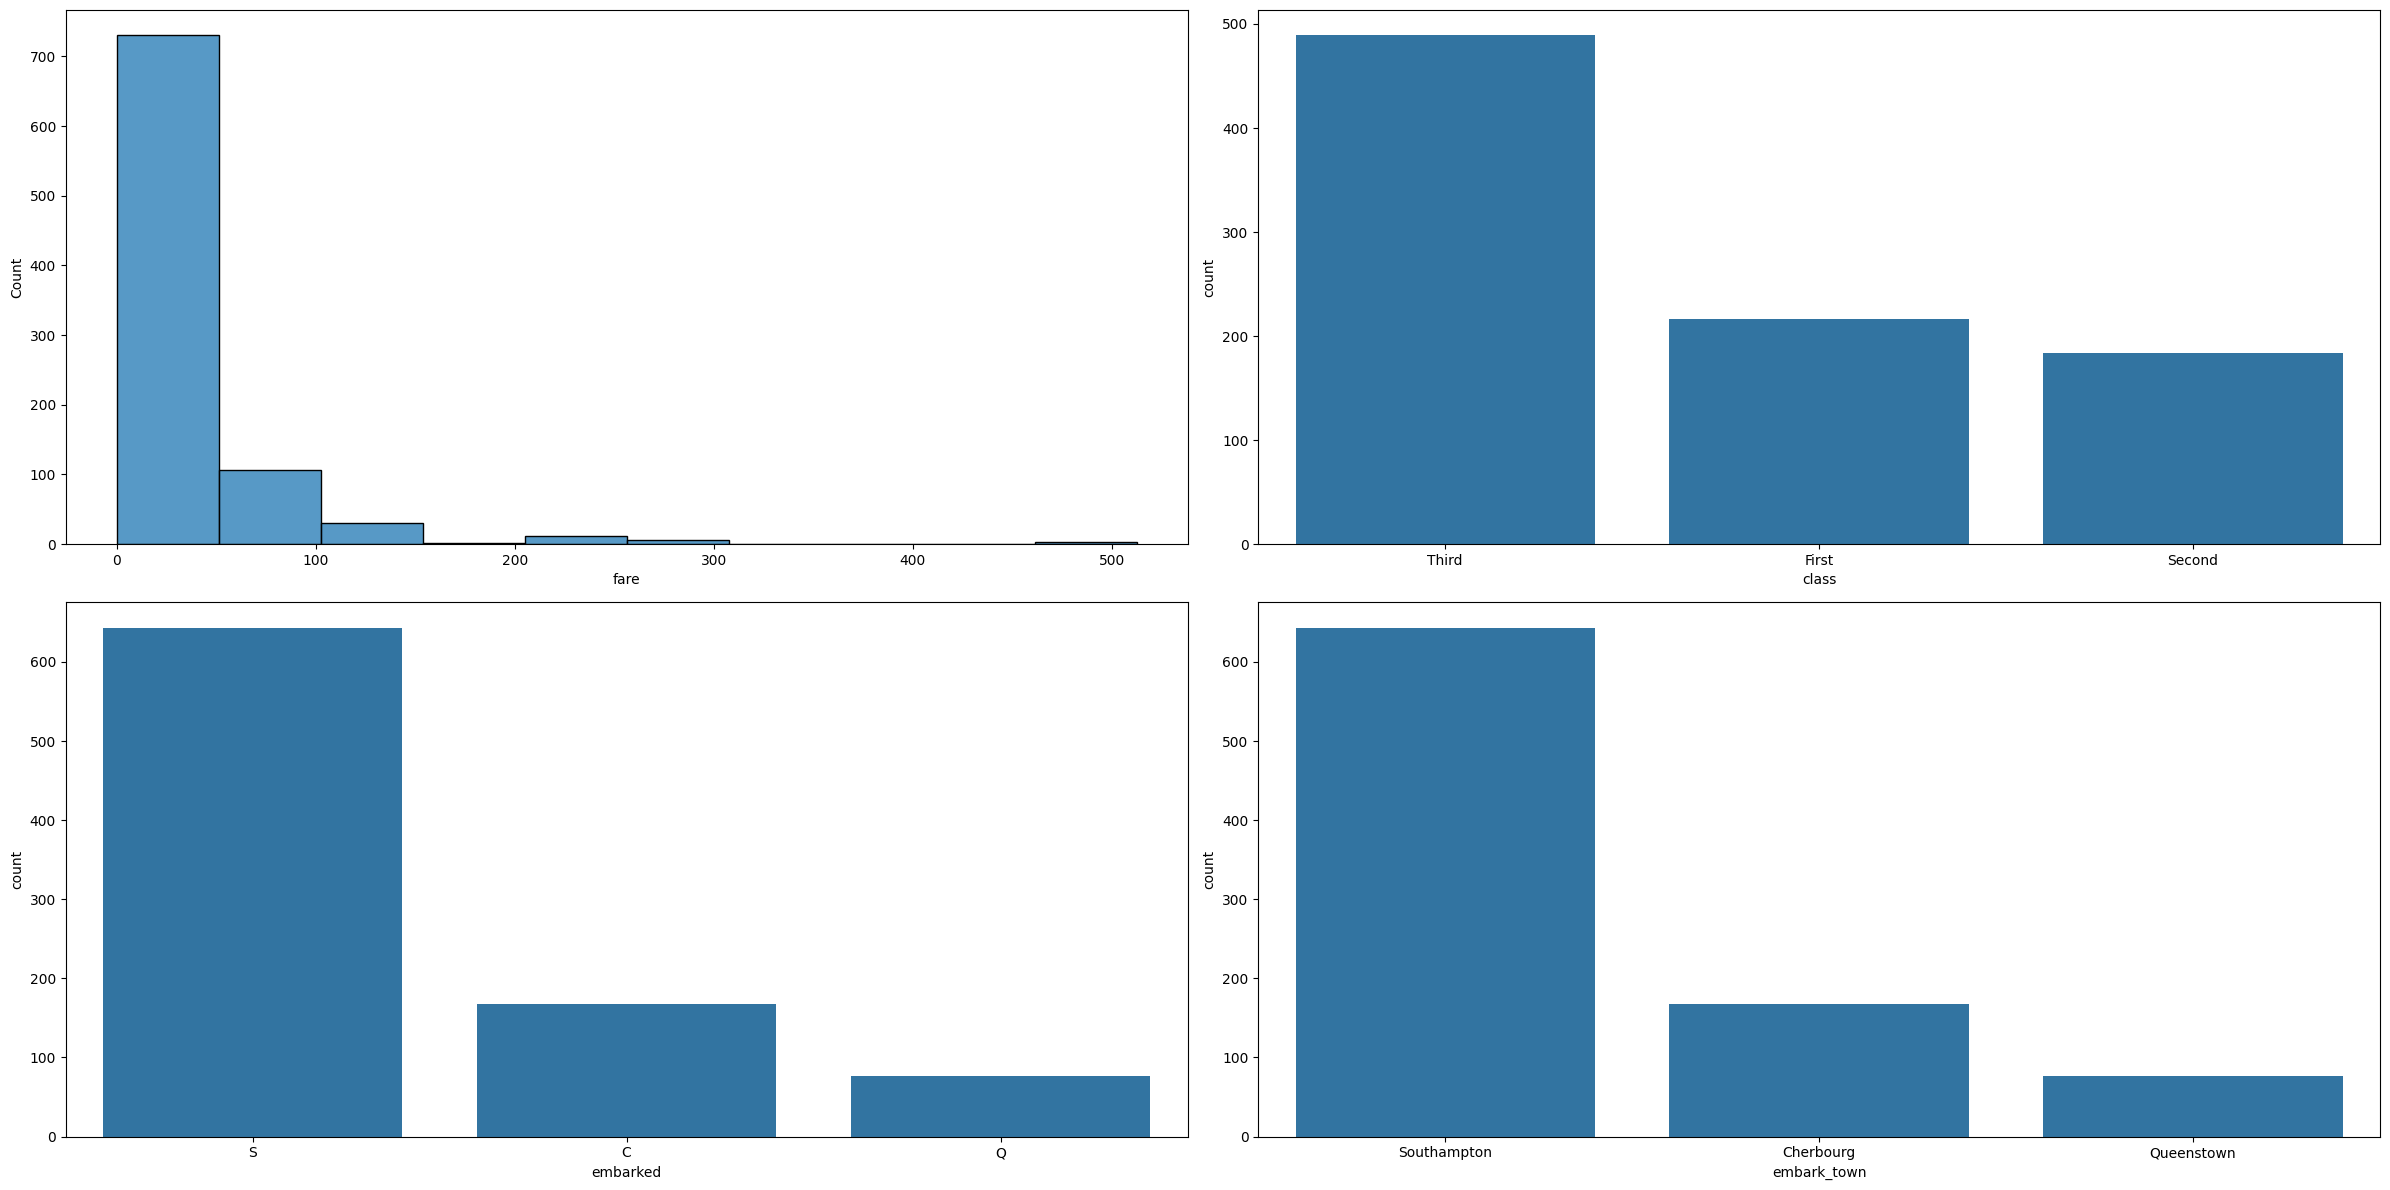

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(24,12))
custom_pallete = sns.color_palette('coolwarm')
sns.set_palette(custom_pallete)

sns.histplot(data=data, x='fare', bins=10, ax=ax[0][0])
sns.countplot(data=data, x='class', ax=ax[0][1])
sns.countplot(data=data, x='embarked', ax=ax[1][0])
sns.countplot(data=data, x='embark_town', ax=ax[1][1])

plt.tight_layout()
plt.show()

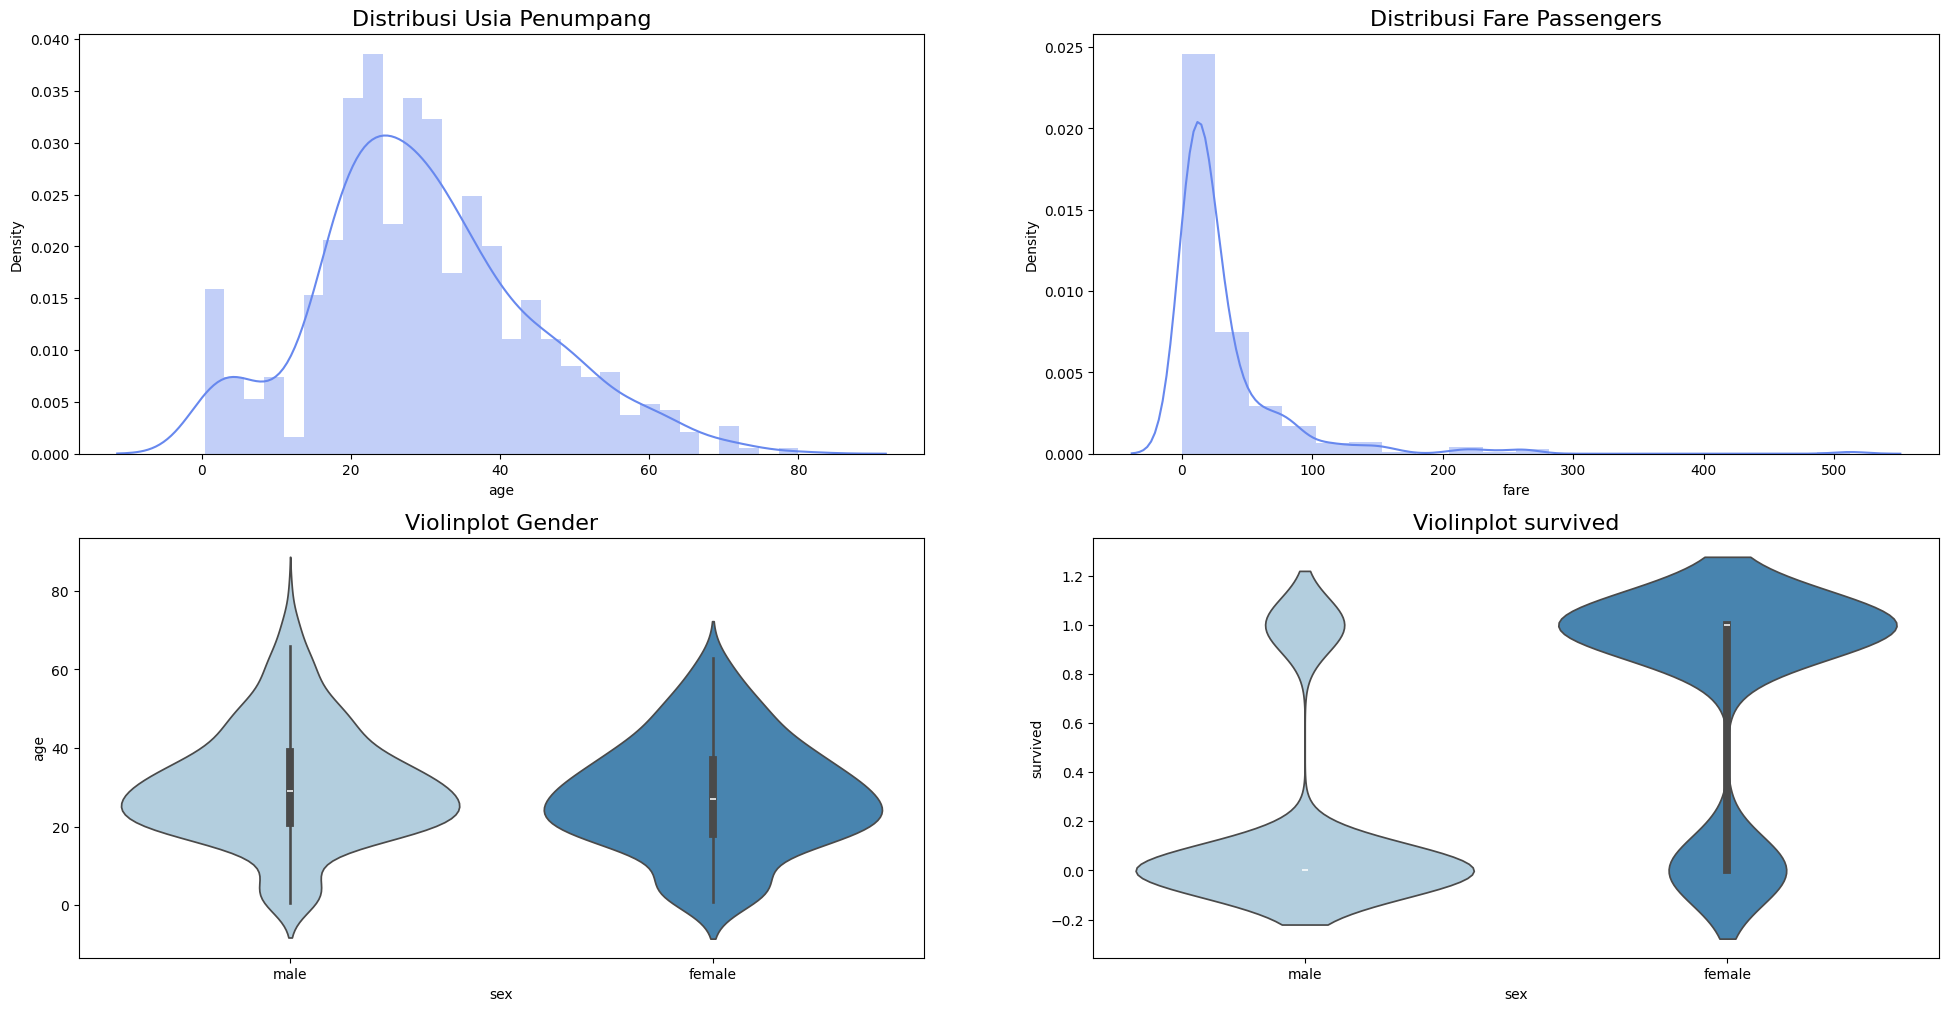

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (24, 12))
custom_pallete2 = 'Blues'
custom_pallete3 = sns.set_palette("coolwarm")
sns.set_palette(custom_pallete3)

sns.distplot(data['age'], kde=True, bins=30, color=custom_pallete3, ax=ax[0][0])
ax[0][0].set_title("Distribusi Usia Penumpang", loc="Center", fontsize=16)
sns.distplot(data['fare'], kde=True, bins=20, color=custom_pallete3, ax=ax[0][1])
ax[0][1].set_title("Distribusi Fare Passengers", loc="Center", fontsize=16)
sns.violinplot(x = 'sex', y = 'age', data=data, palette=custom_pallete2, ax=ax[1][0])
ax[1][0].set_title("Violinplot Gender", loc = "center", fontsize=16)
sns.violinplot(x = 'sex', y = 'survived', data=data, palette=custom_pallete2, ax=ax[1][1])
ax[1][1].set_title("Violinplot survived", loc = "center", fontsize = 16)

plt.show()

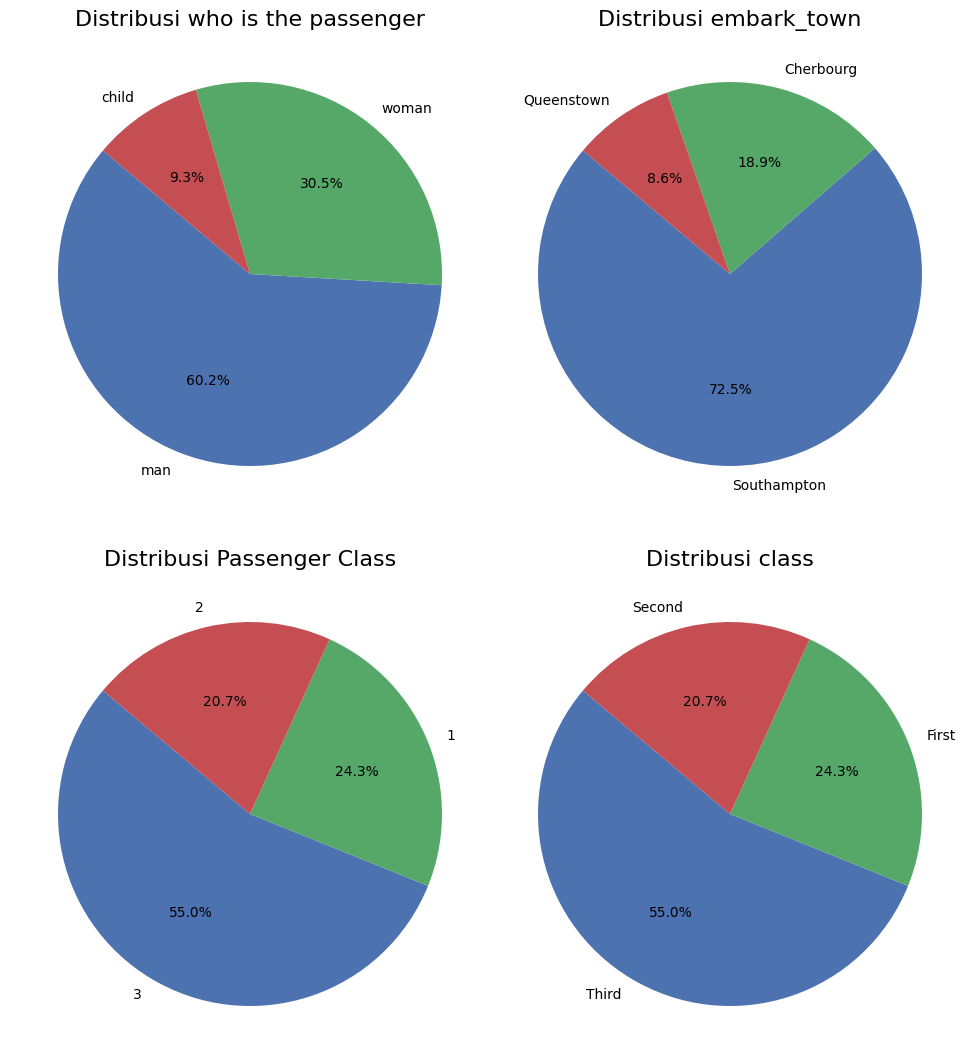

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))
custom_pallete3 = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
sns.set_palette(custom_pallete3)

data['embark_town'].value_counts().plot(kind='pie', autopct = '%1.1f%%', colors= custom_pallete3, startangle =140, ax=ax[0][0])
ax[0][0].set_title("Distribusi embark_town", loc = 'center', fontsize = 16)
ax[0][0].set_ylabel('')
ax[0][0].set_aspect('equal')
ax[0][0].set_position([0.75, 0.55, 0.4, 0.4])
data['who'].value_counts().plot(kind='pie', autopct = '%1.1f%%', colors= custom_pallete3, startangle =140, ax=ax[0][1])
ax[0][1].set_title("Distribusi who is the passenger", loc = 'center', fontsize = 16)
ax[0][1].set_ylabel('')
ax[0][1].set_aspect('equal')
ax[0][1].set_position([0.55, 0.55, 0.4, 0.4])
data['class'].value_counts().plot(kind='pie', autopct = '%1.1f%%', colors= custom_pallete3, startangle =140, ax=ax[1][0])
ax[1][0].set_title("Distribusi class", loc = 'center', fontsize = 16)
ax[1][0].set_ylabel('')
ax[1][0].set_aspect('equal')
ax[1][0].set_position([0.75, 0.1, 0.4, 0.4])
data['pclass'].value_counts().plot(kind='pie', autopct = '%1.1f%%', colors= custom_pallete3, startangle =140, ax=ax[1][1])
ax[1][1].set_title("Distribusi Passenger Class", loc = 'center', fontsize = 16)
ax[1][1].set_ylabel('')
ax[1][1].set_aspect('equal')
ax[1][1].set_position([0.55, 0.1, 0.4, 0.4])

#plt.tight_layout()
plt.show()

### **2. *Pre-Processing*:**

In [14]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  887 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.2+ KB


In [16]:
len(data)

889

In [17]:
data.drop(columns=['deck', 'adult_male', 'alive', 'class', 'who', 'embark_town', 'alone'], inplace=True)

menghapus kolom tersebut karena:

> *deck* : sebagian besar nilainya adalah NaN

> *adult_male*, *alive*, *class*, *who*, *embark_town*, *alone* : feature ini mengacu pada kolom yang sudah ada

In [18]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
884,0,2,male,27.0,0,0,13.00,S
885,1,1,female,19.0,0,0,30.00,S
886,0,3,female,NaN,1,2,23.45,S
887,1,1,male,26.0,0,0,30.00,C
888,0,3,male,32.0,0,0,7.75,Q


In [19]:
len(data)

889

##### **a. Apakah terdapat missing value pada data tersebut?**

Handling Missing Value

In [20]:
data.isna().sum()

survived      0
pclass        0
sex           0
age         176
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [21]:
len(data)

889

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       713 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  887 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [23]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S
885,1,1,female,19.0,0,0,30.0000,S
886,0,3,female,NaN,1,2,23.4500,S
887,1,1,male,26.0,0,0,30.0000,C


Dari output tersebut, kita ketahui bahwa kolom age memiliki nilai kosong 176, kemudian beberapa kolom memiliki sedikit nilai kosong. Hal tersebut penting karena data yang hilang bisa mempengaruhi analisis atau peforma model prediksi yang akan dikembangkan nantinya.

##### **b. Jika ya, apa anda dilakukan?**

In [24]:
data['age'].mean()

29.69869565217391

In [25]:
# Menangani data kosong pada feature age dengan imputasi mean
data['age'].fillna(data['age'].mean(), inplace=True)

> Kolom `age` diisi dengan nilai mean karena data umur bersifat kontinu dan rentan terhadap outlier

In [26]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
884,0,2,male,27.000000,0,0,13.00,S
885,1,1,female,19.000000,0,0,30.00,S
886,0,3,female,29.698696,1,2,23.45,S
887,1,1,male,26.000000,0,0,30.00,C
888,0,3,male,32.000000,0,0,7.75,Q


In [27]:
# Untuk kolom 'embarked', kita isi dengan modus (nilai yang paling sering muncul)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

> Kolom `embarked` diisi dengan modus karena biasanya hanya memiliki sedikit kategori dan pengaruhnya kecil.

In [28]:
# Mengecek ulang nilai kosong dalam dataset
data.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [29]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0,0,13.0000,S
885,1,1,female,19.000000,0,0,30.0000,S
886,0,3,female,29.698696,1,2,23.4500,S
887,1,1,male,26.000000,0,0,30.0000,C


In [30]:
len(data)

889

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


##### **c. Apakah terdapat outlier pada data tersebut? jelaskan apa itu outlier!**

Boxplot untuk cek outlier

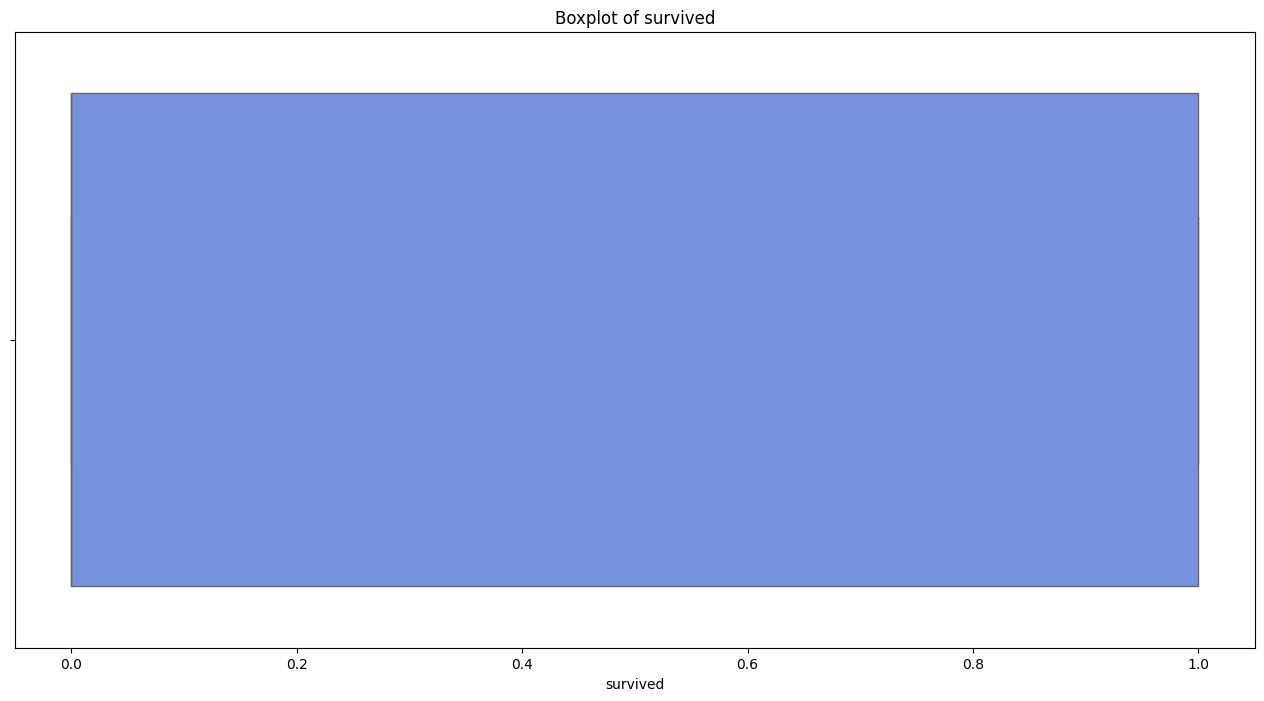

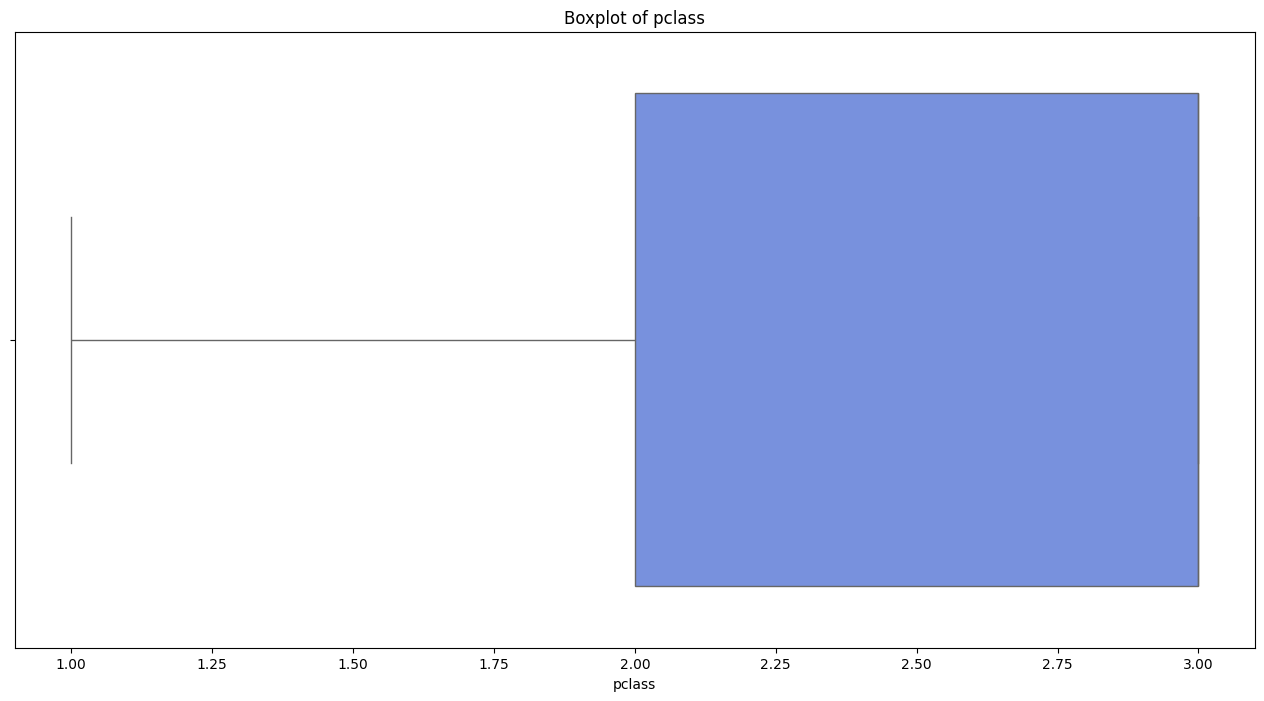

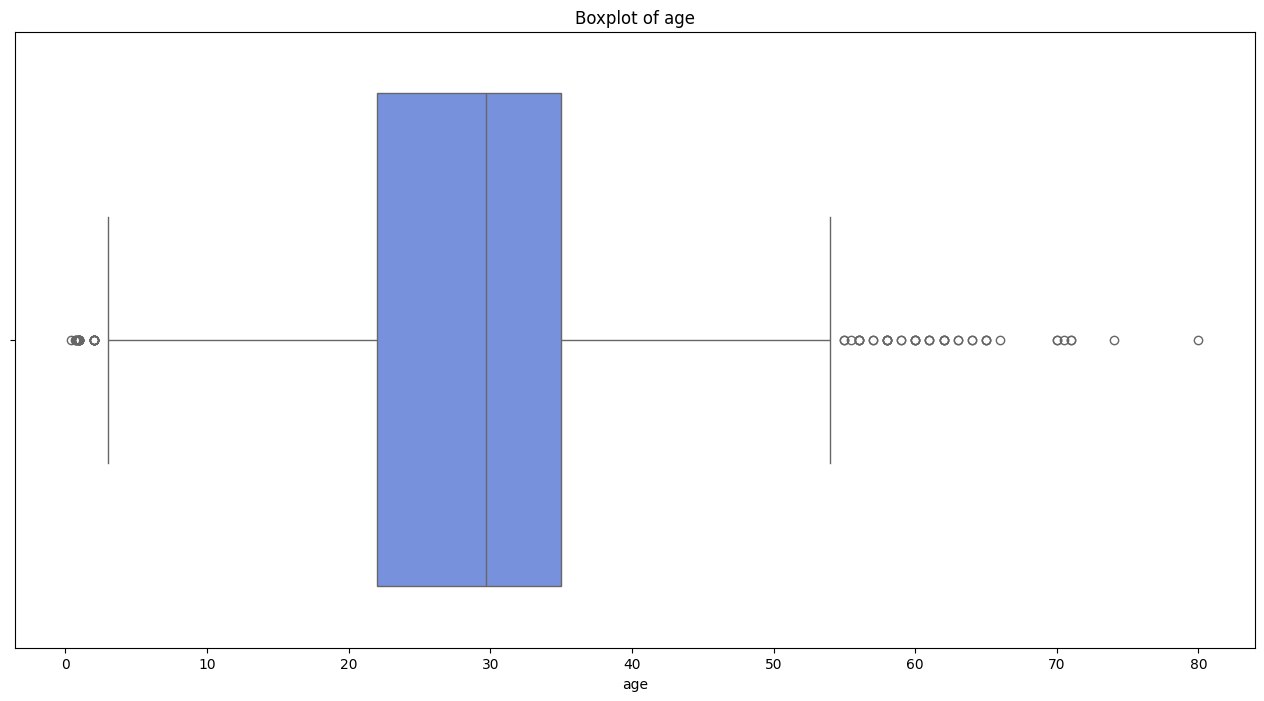

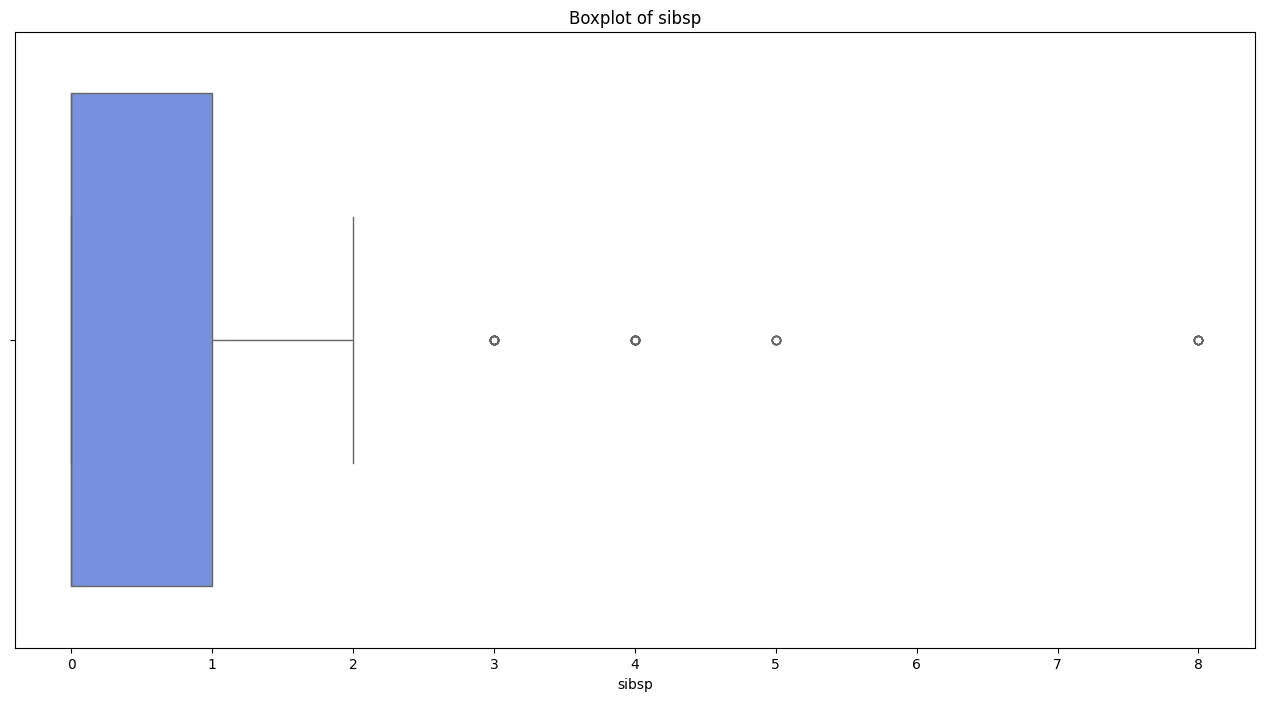

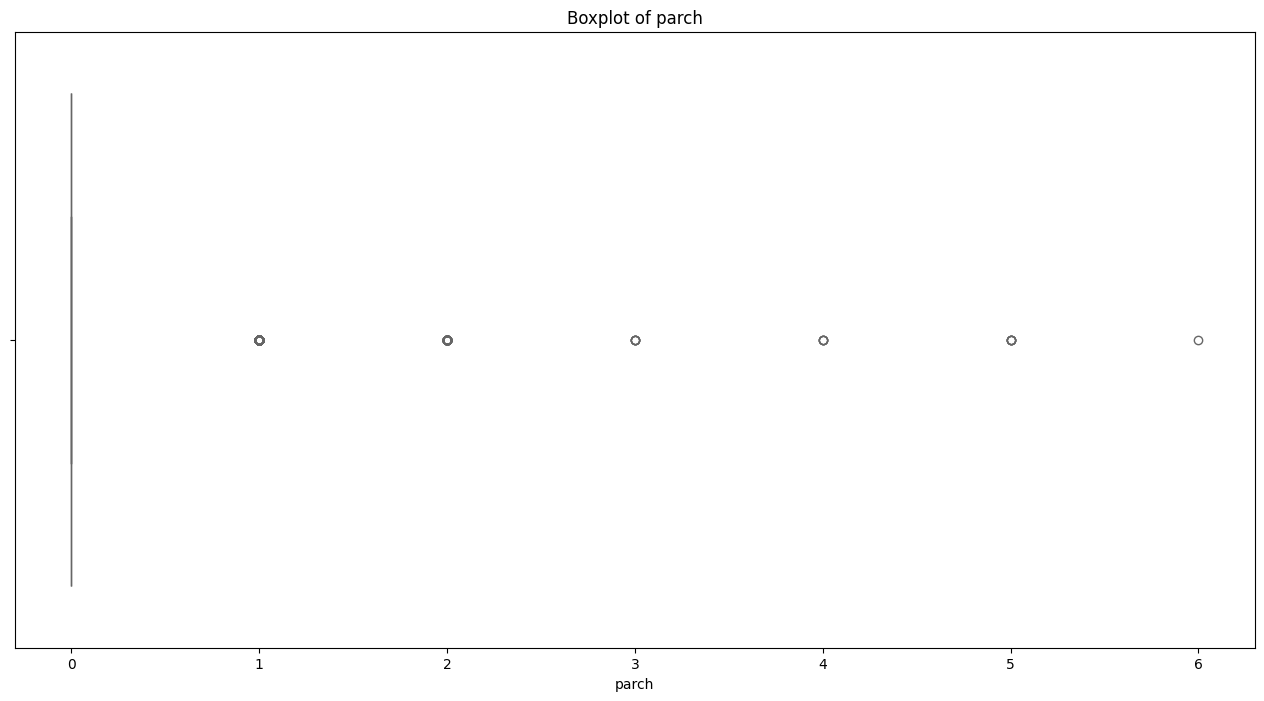

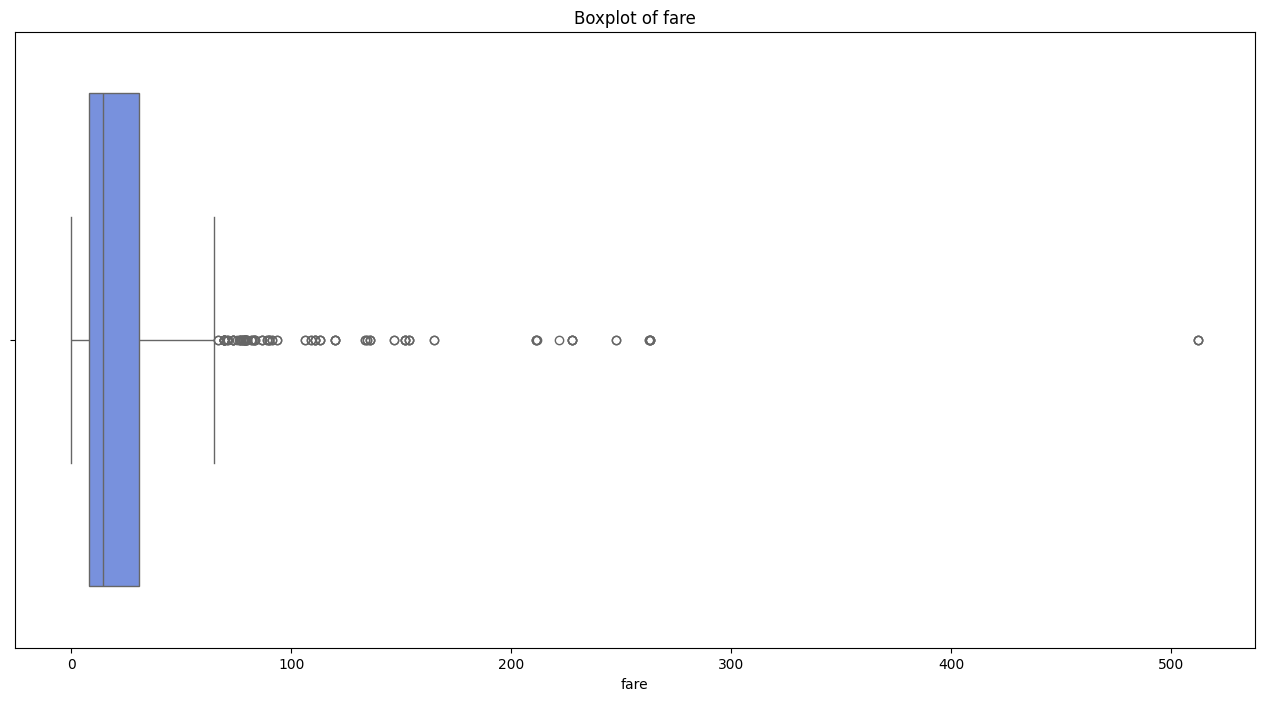

In [32]:
custom_pallete = "coolwarm"
sns.set_palette(custom_pallete)
for col in data.select_dtypes(include=["integer", "float"]).columns:
    fig, ax = plt.subplots(figsize = (16, 8))
    ax.set_title(f"Boxplot of {col}")
    bp = sns.boxplot(data=data, x=col, ax=ax)
    plt.show()
    plt.close(fig)

Berdasarkan visualisasi boxplot tersebut, kita ketahui bahwa terdapat beberapa outlier pada feature tertentu, namun kita dapat pertimbangkan feature mana yang outliernya perlu diatasi.

In [33]:
# Mendeteksi outlier pada kolom 'age' dan 'fare' menggunakan metode IQR
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outlier_age = detect_outliers('age')
outlier_fare = detect_outliers('fare')

print(f"Jumlah outlier pada kolom 'age': {len(outlier_age)}")
print(f"Jumlah outlier pada kolom 'fare': {len(outlier_fare)}")

Jumlah outlier pada kolom 'age': 66
Jumlah outlier pada kolom 'fare': 116


Outlier adalah nilai yang secara signifikan berbeda dari mayoritas data.  
Misalnya, penumpang dengan umur sangat tua atau harga tiket sangat mahal bisa dianggap outlier.  
Outlier dapat mempengaruhi hasil analisis statistik atau performa model jika tidak ditangani dengan baik.

##### **d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?**

In [34]:
# Menghapus outlier pada 'age' dan 'fare'
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data = remove_outliers(data, 'age')
data = remove_outliers(data, 'fare')

print(f"Jumlah data setelah menghapus outlier: {len(data)}")

Jumlah data setelah menghapus outlier: 716


In [35]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.698696,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0,0,13.0000,S
885,1,1,female,19.000000,0,0,30.0000,S
886,0,3,female,29.698696,1,2,23.4500,S
887,1,1,male,26.000000,0,0,30.0000,C


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  716 non-null    int64  
 1   pclass    716 non-null    int64  
 2   sex       716 non-null    object 
 3   age       716 non-null    float64
 4   sibsp     716 non-null    int64  
 5   parch     716 non-null    int64  
 6   fare      716 non-null    float64
 7   embarked  716 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.3+ KB


In [37]:
len(data)

716

Jika tujuan utama adalah membuat model prediktif, maka sebaiknya outlier diatasi.  
Salah satu metode yang umum digunakan adalah **IQR** (Interquartile Range).  
Outlier yang ekstrem dihapus agar model tidak "terganggu" oleh nilai yang tidak representatif.

##### **e. Jika dibutuhkan silakan lakukan transformasi standarisasi/scaling terhadap data tersebut**

> Encoding Data Kategorikal

Beberapa algoritma machine learning tidak bisa bekerja langsung dengan data kategorikal. Oleh karena itu, encoding dilakukan.

In [38]:
# Mengecek feature yang tergolong dalam data kategorikal
for col in data.columns:
    if data[col].dtype == "object":
        print(data[col].value_counts())
        print("\n")

sex
male      487
female    229
Name: count, dtype: int64


embarked
S    542
C    104
Q     70
Name: count, dtype: int64




In [39]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.698696,0,0,8.4583,Q


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  716 non-null    int64  
 1   pclass    716 non-null    int64  
 2   sex       716 non-null    object 
 3   age       716 non-null    float64
 4   sibsp     716 non-null    int64  
 5   parch     716 non-null    int64  
 6   fare      716 non-null    float64
 7   embarked  716 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.3+ KB


In [41]:
len(data)

716

One-Hot Encoding (OHE) → Untuk data yang tidak memiliki urutan.

* Kolom yang akan dikodekan dengan OneHotEncoder(): [sex]

Label Encoding (LAB) → Untuk data kategorikal yang unik tanpa urutan.

* Kolom yang akan dikodekan dengan LabelEncoder(): [embarked]

In [42]:
le = LabelEncoder()
data['embarked'] = le.fit_transform(data['embarked'])

In [43]:
len(data)

716

In [44]:
data['sex'] = le.fit_transform(data['sex'])

In [45]:
len(data)

716

In [46]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.000000,1,0,7.2500,2
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.698696,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
884,0,2,1,27.000000,0,0,13.0000,2
885,1,1,0,19.000000,0,0,30.0000,2
886,0,3,0,29.698696,1,2,23.4500,2
887,1,1,1,26.000000,0,0,30.0000,0


In [47]:
data.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [48]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
884,0,2,1,27.000000,0,0,13.00,2
885,1,1,0,19.000000,0,0,30.00,2
886,0,3,0,29.698696,1,2,23.45,2
887,1,1,1,26.000000,0,0,30.00,0
888,0,3,1,32.000000,0,0,7.75,1


In [49]:
len(data)

716

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  716 non-null    int64  
 1   pclass    716 non-null    int64  
 2   sex       716 non-null    int32  
 3   age       716 non-null    float64
 4   sibsp     716 non-null    int64  
 5   parch     716 non-null    int64  
 6   fare      716 non-null    float64
 7   embarked  716 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 44.8 KB


In [51]:
# Mengecek data duplikat
data.duplicated().sum()

103

In [52]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [53]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,3,0,26.000000,0,0,7.9250,2
2,1,1,0,35.000000,1,0,53.1000,2
3,0,3,1,35.000000,0,0,8.0500,2
4,0,3,1,29.698696,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
608,0,3,0,39.000000,0,5,29.1250,1
609,1,1,0,19.000000,0,0,30.0000,2
610,0,3,0,29.698696,1,2,23.4500,2
611,1,1,1,26.000000,0,0,30.0000,0


In [54]:
print(f"Jumlah data setelah menghapus duplikat: {len(data)}")

Jumlah data setelah menghapus duplikat: 613


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  613 non-null    int64  
 1   pclass    613 non-null    int64  
 2   sex       613 non-null    int32  
 3   age       613 non-null    float64
 4   sibsp     613 non-null    int64  
 5   parch     613 non-null    int64  
 6   fare      613 non-null    float64
 7   embarked  613 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 33.7 KB


In [56]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
608,0,3,0,39.000000,0,5,29.125,1
609,1,1,0,19.000000,0,0,30.000,2
610,0,3,0,29.698696,1,2,23.450,2
611,1,1,1,26.000000,0,0,30.000,0
612,0,3,1,32.000000,0,0,7.750,1


Hasilnya, semua fitur kategorikal kini telah dikonversi menjadi bentuk numerik dan siap digunakan untuk modeling

> Scaling Data

Scaling penting terutama untuk algoritma yang sensitif terhadap skala, seperti SVM atau KNN.  
StandardScaler akan mentransformasikan fitur agar memiliki **rata-rata 0** dan **standar deviasi 1**, sehingga model bisa belajar lebih efisien dari fitur tersebut.

In [57]:
Features=data.drop(columns="survived")
Goal=data["survived"]

In [58]:
Features

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.000000,1,0,7.2500,2
1,3,0,26.000000,0,0,7.9250,2
2,1,0,35.000000,1,0,53.1000,2
3,3,1,35.000000,0,0,8.0500,2
4,3,1,29.698696,0,0,8.4583,1
...,...,...,...,...,...,...,...
608,3,0,39.000000,0,5,29.1250,1
609,1,0,19.000000,0,0,30.0000,2
610,3,0,29.698696,1,2,23.4500,2
611,1,1,26.000000,0,0,30.0000,0


In [59]:
Features = StandardScaler().fit_transform(Features)

In [60]:
Features

array([[ 0.71764746,  0.724483  , -0.59594614, ..., -0.43905636,
        -0.81913376,  0.52584931],
       [ 0.71764746, -1.38029463, -0.22183761, ..., -0.43905636,
        -0.76943943,  0.52584931],
       [-1.98123533, -1.38029463,  0.61990658, ..., -0.43905636,
         2.55639965,  0.52584931],
       ...,
       [ 0.71764746, -1.38029463,  0.12409078, ...,  1.95331297,
         0.37353017,  0.52584931],
       [-1.98123533,  0.724483  , -0.22183761, ..., -0.43905636,
         0.85574923, -2.19436697],
       [ 0.71764746,  0.724483  ,  0.33932518, ..., -0.43905636,
        -0.78232314, -0.83425883]])

In [61]:
Features = pd.DataFrame(Features)

In [62]:
Features

,0,1,2,3,4,5,6
0,0.717647,0.724483,-0.595946,0.603781,-0.439056,-0.819134,0.525849
1,0.717647,-1.380295,-0.221838,-0.514400,-0.439056,-0.769439,0.525849
2,-1.981235,-1.380295,0.619907,0.603781,-0.439056,2.556400,0.525849
3,0.717647,0.724483,0.619907,-0.514400,-0.439056,-0.760237,0.525849
4,0.717647,0.724483,0.124091,-0.514400,-0.439056,-0.730177,-0.834259
...,...,...,...,...,...,...,...
608,0.717647,-1.380295,0.994015,-0.514400,5.541867,0.791331,-0.834259
609,-1.981235,-1.380295,-0.876528,-0.514400,-0.439056,0.855749,0.525849
610,0.717647,-1.380295,0.124091,0.603781,1.953313,0.373530,0.525849
611,-1.981235,0.724483,-0.221838,-0.514400,-0.439056,0.855749,-2.194367


In [63]:
Features.columns=["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
Features.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,0.717647,0.724483,-0.595946,0.603781,-0.439056,-0.819134,0.525849
1,0.717647,-1.380295,-0.221838,-0.514400,-0.439056,-0.769439,0.525849
2,-1.981235,-1.380295,0.619907,0.603781,-0.439056,2.556400,0.525849
3,0.717647,0.724483,0.619907,-0.514400,-0.439056,-0.760237,0.525849
4,0.717647,0.724483,0.124091,-0.514400,-0.439056,-0.730177,-0.834259


In [64]:
Features

,pclass,sex,age,sibsp,parch,fare,embarked
0,0.717647,0.724483,-0.595946,0.603781,-0.439056,-0.819134,0.525849
1,0.717647,-1.380295,-0.221838,-0.514400,-0.439056,-0.769439,0.525849
2,-1.981235,-1.380295,0.619907,0.603781,-0.439056,2.556400,0.525849
3,0.717647,0.724483,0.619907,-0.514400,-0.439056,-0.760237,0.525849
4,0.717647,0.724483,0.124091,-0.514400,-0.439056,-0.730177,-0.834259
...,...,...,...,...,...,...,...
608,0.717647,-1.380295,0.994015,-0.514400,5.541867,0.791331,-0.834259
609,-1.981235,-1.380295,-0.876528,-0.514400,-0.439056,0.855749,0.525849
610,0.717647,-1.380295,0.124091,0.603781,1.953313,0.373530,0.525849
611,-1.981235,0.724483,-0.221838,-0.514400,-0.439056,0.855749,-2.194367


In [65]:
Goal

0      0
1      1
2      1
3      0
4      0
      ..
608    0
609    1
610    0
611    1
612    0
Name: survived, Length: 613, dtype: int64

In [66]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    613 non-null    float64
 1   sex       613 non-null    float64
 2   age       613 non-null    float64
 3   sibsp     613 non-null    float64
 4   parch     613 non-null    float64
 5   fare      613 non-null    float64
 6   embarked  613 non-null    float64
dtypes: float64(7)
memory usage: 33.7 KB


### ***3. Modelling*:**

##### **a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.**

Pembagian data menjadi training dan testing adalah langkah penting dalam proses pembuatan model machine learning. Proses ini bertujuan untuk mengevaluasi bagaimana performa model ketika dihadapkan dengan data yang belum pernah dilihat sebelumnya.

> Training Set (Data Latih/Ftrain):

Merupakan bagian data yang digunakan untuk "mengajari" model agar dapat memahami pola dan hubungan antar fitur dengan target (dalam hal ini: apakah penumpang selamat atau tidak).

>Testing Set (Data Uji/Ftest):

Merupakan bagian data yang tidak digunakan selama pelatihan, tapi digunakan untuk mengevaluasi performa model. Ini penting untuk melihat apakah model mampu melakukan generalisasi terhadap data baru.

Splitting Train And Test Groups :

##### **b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?**

In [67]:
Ftrain, Ftest, Gtrain, Gtest = train_test_split(Features, Goal, test_size= 0.1, random_state=42)

Alasan yang kita pertimbangkan dengan membagi data menjadi data latih 90% dan data uji 10% adalah sebagai berikut:

Data Relatif Kecil:
Saat dataset tidak terlalu besar (seperti 652 baris), membagi terlalu banyak untuk testing (misalnya 30%) bisa menyebabkan model kekurangan data untuk belajar.

Fokus pada Pelatihan Model:
Dengan 90% data untuk pelatihan, model bisa belajar pola dengan lebih baik dan stabil, khususnya jika melakukan tuning parameter (seperti menggunakan GridSearchCV).

Testing Tetap Cukup Representatif:
10% (65 data) masih bisa digunakan sebagai uji performa dasar model karena data memiliki distribusi label yang cukup seimbang.

##### **c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya**

##### **d. Berapa nilai evaluasi dari masing masing model pada data uji? Apa arti dari masing masing metrik evaluasi tersebut?**

##### 1). Model Logistic Regression

Logistic Regression adalah algoritma klasifikasi statistik yang digunakan untuk memprediksi probabilitas suatu instance termasuk dalam kelas tertentu.

* Fungsi Utama:

Fungsi Sigmoid: Mengubah output linear menjadi probabilitas antara 0 dan 1

Decision Boundary: Biasanya di threshold 0.5

_Jika σ(z) ≥ 0.5 → prediksi kelas 1_

_Jika σ(z) < 0.5 → prediksi kelas 0_

* Cara Kerja Model yang kita kembangkan:
> GridSearchCV:

 1. Mengevaluasi semua kombinasi parameter yang ditentukan

 2. Menggunakan 5-fold cross validation (cv=5)

 3. Memilih kombinasi parameter dengan performa terbaik

Menggunakan Gridsearch untuk Mencari nilai Optimal Model Logistic Regression

In [68]:
LR_params = {'penalty' : ['l1', 'l2', 'elasticnet', 'None'],
             'dual' : [True, False],
             'tol' : [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4,1e+5],
             'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

LR = LogisticRegression()
GRS = GridSearchCV(LR, LR_params, cv=5)
GRS.fit(Ftrain, Gtrain)

print(GRS.best_params_)
print(GRS.best_score_)

{'dual': False, 'penalty': 'l1', 'solver': 'saga', 'tol': 1.0}
0.7823259623259623


> Logistic Regression:

 Model klasifikasi biner (kelas 0 dan 1)

 Menggunakan fungsi sigmoid untuk memetakan output ke probabilitas

 Parameter terbaik yang ditemukan:

 penalty='l1': Regularisasi L1 (Lasso)

 dual=False: Menggunakan formulasi primal

 solver='saga': Algoritma optimasi untuk dataset besar

 tol=1.0: Toleransi besar untuk kriteria berhenti

Membuat prediksi

In [87]:
LR = LogisticRegression(dual=False, penalty='l1', solver='saga', tol=1.0)
LR.fit(Ftrain,Gtrain)
LR_predict = LR.predict(Ftest)
LR_predict_train = LR.predict(Ftrain)

In [88]:
print("Classification Report for the test group : \n")
print(classification_report(Gtest,LR_predict),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Gtrain,LR_predict_train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.76      0.76      0.76        21

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84        62
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       350
           1       0.70      0.64      0.67       201

    accuracy                           0.77       551
   macro avg       0.75      0.74      0.74       551
weighted avg       0.76      0.77      0.77       551
 




In [89]:
test_accuracy = accuracy_score(Gtest, LR_predict)
print(f"Accuracy Score for the test group: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, LR_predict_train)
print(f"Accuracy Score for the train group: {train_accuracy:.4f}\n")

Accuracy Score for the test group: 0.8387

Accuracy Score for the train group: 0.7677



[[36  5]
 [ 5 16]]


<Axes: >

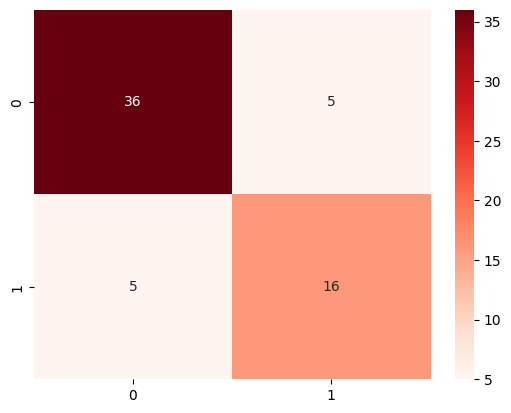

In [90]:
CM_LR = confusion_matrix(Gtest, LR_predict)
print(CM_LR)
sns.heatmap(CM_LR, annot= True, cmap= 'Reds')

* Arti Metrik Evaluasi

> Precision:

Rasio prediksi benar positif terhadap semua prediksi positif

Contoh: Precision 0.80 untuk kelas 0 berarti 80% prediksi kelas 0 benar

> Recall (Sensitivity):

Rasio prediksi benar positif terhadap semua kasus aktual positif

Recall 0.88 untuk kelas 0 berarti model menangkap 88% dari semua kasus kelas 0 sebenarnya

> F1-Score:

Rata-rata harmonik precision dan recall (2(precisionrecall)/(precision+recall))

Berguna ketika kelas tidak seimbang

> Accuracy:

Persentase prediksi yang benar secara keseluruhan

Pada data testing 83%, pada training 76%

> Macro Avg:

Rata-rata metrik untuk semua kelas tanpa mempertimbangkan ketidakseimbangan kelas

> Weighted Avg:

Rata-rata metrik yang diberi bobot berdasarkan jumlah sampel di tiap kelas

* Analisis Hasil
> Underfitting:

Terjadi gap performa antara training (76%) dan testing (83%), Namun gap tidak terlalu besar (7%), menunjukkan underfitting yang masih terkendali

> Kualitas Model:

Performa lebih baik pada kelas 0 dibanding kelas 1, F1-score testing 0.88 (kelas 0) vs 0.76 (kelas 1) menunjukkan ketidakseimbangan klasifikasi

Model ini menunjukkan performa yang cukup baik dengan akurasi 88% pada data testing, tetapi masih ada ruang untuk perbaikan terutama dalam menangani ketidakseimbangan kelas dan mengurangi overfitting.

##### 2). Model CatBoost Model

CatBoost (Categorical Boosting) adalah algoritma gradient boosting yang dikembangkan oleh Yandex yang secara khusus dirancang untuk menangani data kategorikal secara native.

* Keunggulan CatBoost:

1. Penanganan Data Kategorikal Otomatis: Tidak memerlukan preprocessing one-hot encoding

2. Ordered Boosting: Teknik khusus untuk mencegah target leakage

3. Robust terhadap Overfitting: Menggunakan berbagai teknik regularisasi

* Cara Kerja Model:

> GridSearchCV

Proses Grid Search:
1. Kombinasi Parameter:

_2 learning_rate × 3 depth × 3 iterations × 2 bagging_temperature = 36 kombinasi_

2. 5-Fold Cross Validation:

_Setiap kombinasi diuji dengan 5 fold validasi silang_

_Total model yang dilatih: 36 × 5 = 180 model_

3. Output Training:

_Log menunjukkan proses pembelajaran (learn: nilai loss)_

_Waktu eksekusi per iterasi (total dan remaining)_

Applying GridSearch Model on  CatBoost Model:

In [73]:
CB_params = {
    'learning_rate' : [0.05, 0.1],
    'depth' : [3, 5, 7],
    'iterations' : [100, 200, 250],
    'bagging_temperature' : [0.5, 1.0]
}

CB = CatBoostClassifier()
GRS = GridSearchCV(CB, CB_params, cv = 5)
GRS.fit(Ftrain, Gtrain)

# Print the best parameters and best score
print(GRS.best_params_)
print(GRS.best_score_)

0:	learn: 0.6766151	total: 147ms	remaining: 14.5s
1:	learn: 0.6657328	total: 148ms	remaining: 7.24s
2:	learn: 0.6521677	total: 148ms	remaining: 4.79s
3:	learn: 0.6398524	total: 149ms	remaining: 3.57s
4:	learn: 0.6288863	total: 149ms	remaining: 2.84s
5:	learn: 0.6198930	total: 150ms	remaining: 2.35s
6:	learn: 0.6123255	total: 150ms	remaining: 1.99s
7:	learn: 0.6055301	total: 151ms	remaining: 1.73s
8:	learn: 0.5967195	total: 151ms	remaining: 1.53s
9:	learn: 0.5885430	total: 152ms	remaining: 1.37s
10:	learn: 0.5805087	total: 154ms	remaining: 1.24s
11:	learn: 0.5733547	total: 155ms	remaining: 1.13s
12:	learn: 0.5674485	total: 155ms	remaining: 1.04s
13:	learn: 0.5609095	total: 155ms	remaining: 955ms
14:	learn: 0.5549119	total: 156ms	remaining: 883ms
15:	learn: 0.5491985	total: 157ms	remaining: 826ms
16:	learn: 0.5439426	total: 158ms	remaining: 773ms
17:	learn: 0.5406809	total: 159ms	remaining: 724ms
18:	learn: 0.5362496	total: 160ms	remaining: 682ms
19:	learn: 0.5323954	total: 161ms	remaini

> Parameter CatBoost

a. learning_rate (0.05)
Langkah pembelajaran kecil (konservatif)

Membutuhkan lebih banyak iterasi tetapi lebih presisi

Nilai kecil membantu menghindari overfitting

b. depth (3)
Kedalaman pohon yang sedang

Depth 3 berarti pohon memiliki 3 level split

Kompromi antara kapasitas model dan risiko overfitting

c. iterations (250)
Jumlah total pohon dalam ensemble

Setiap iterasi menambahkan satu pohon baru

Cukup besar untuk model yang kompleks

d. bagging_temperature (0.5)
Mengontrol intensitas Bayesian bagging

Nilai 0.5 berarti:

Pengambilan sampel yang cukup agresif

Meningkatkan diversitas pohon

Mengurangi variance tanpa meningkatkan bias terlalu banyak

> CatBoost

1. Inisialisasi:

_Model dimulai dengan prediksi awal (nilai konstan)_

2. Pembuatan Pohon Secara Berurutan:

`0:learn:0.6715174 (loss awal)`
`1:learn:0.6448193 (perbaikan setelah pohon pertama)`
`...`
`199:learn:0.3048131 (loss akhir)`
_Setiap pohon baru mencoba memperbaiki residual pohon sebelumnya_

3. Pemrosesan Fitur Kategorikal:

_Menggunakan target statistics dengan permutasi acak_

_Mengganti kategori dengan nilai statistik berdasarkan histori_

4. Regularisasi Otomatis:

_Menggunakan leaf value calculation dengan prior_

_Pertimbangan laplace untuk menghindari overfitting_

In [91]:
CB = CatBoostClassifier(bagging_temperature = 0.5, depth=3, iterations = 250, learning_rate=0.05)
CB.fit(Ftrain, Gtrain)
CB_Pred = CB.predict(Ftest)
CB_Pred_Train = CB.predict(Ftrain)

0:	learn: 0.6711066	total: 1.1ms	remaining: 275ms
1:	learn: 0.6517909	total: 2.15ms	remaining: 267ms
2:	learn: 0.6349005	total: 3.1ms	remaining: 255ms
3:	learn: 0.6196425	total: 3.88ms	remaining: 239ms
4:	learn: 0.6064017	total: 4.99ms	remaining: 244ms
5:	learn: 0.5970712	total: 5.8ms	remaining: 236ms
6:	learn: 0.5873716	total: 6.79ms	remaining: 236ms
7:	learn: 0.5771973	total: 7.65ms	remaining: 231ms
8:	learn: 0.5692122	total: 8.55ms	remaining: 229ms
9:	learn: 0.5604772	total: 9.51ms	remaining: 228ms
10:	learn: 0.5547366	total: 10.3ms	remaining: 223ms
11:	learn: 0.5489046	total: 11ms	remaining: 219ms
12:	learn: 0.5420746	total: 11.8ms	remaining: 214ms
13:	learn: 0.5366028	total: 12.6ms	remaining: 212ms
14:	learn: 0.5323607	total: 13.4ms	remaining: 209ms
15:	learn: 0.5271910	total: 14.1ms	remaining: 207ms
16:	learn: 0.5226343	total: 14.9ms	remaining: 205ms
17:	learn: 0.5194204	total: 15.8ms	remaining: 204ms
18:	learn: 0.5172651	total: 16.7ms	remaining: 203ms
19:	learn: 0.5133346	total:

In [92]:
print('Clasification Report for the test group : \n')
print(classification_report(Gtest, CB_Pred), '\n\n')
print('Clasification Report for the train group (to check if there is any overfitting): \n')
print(classification_report(Gtrain, CB_Pred_Train), '\n\n')

Clasification Report for the test group : 

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.64      0.76      0.70        21

    accuracy                           0.77        62
   macro avg       0.75      0.77      0.76        62
weighted avg       0.79      0.77      0.78        62
 


Clasification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       350
           1       0.88      0.71      0.79       201

    accuracy                           0.86       551
   macro avg       0.86      0.83      0.84       551
weighted avg       0.86      0.86      0.85       551
 




In [93]:
test_accuracy = accuracy_score(Gtest, CB_Pred)
print(f"Skor Akurasi untuk grup data test: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, CB_Pred_Train)
print(f"Skor Akurasi untuk grup data train: {train_accuracy:.4f}\n")

Skor Akurasi untuk grup data test: 0.7742

Skor Akurasi untuk grup data train: 0.8584



[[33  8]
 [ 5 16]]


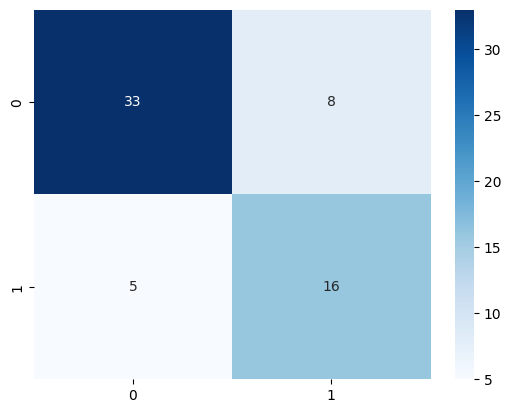

In [77]:
CM_CB = confusion_matrix(Gtest, CB_Pred)
print(CM_CB)
sns.heatmap(CM_CB, annot=True, cmap = 'Blues')
plt.show()

* Arti Metrik Evaluasi
> Precision:

Rasio prediksi benar positif terhadap semua prediksi positif

Contoh: Precision 0.86 untuk kelas 0 berarti 86% prediksi kelas 0 benar

Contoh: Precision 0.64 untuk kelas 1 berarti 64% prediksi kelas 1 benar

> Recall (Sensitivity):

Rasio prediksi benar positif terhadap semua kasus aktual positif

Recall 0.78 untuk kelas 0 berarti model menangkap 78% dari semua kasus kelas 0 sebenarnya

Recall 0.76 untuk kelas 1 berarti model hanya menangkap 76% dari semua kasus kelas 1 sebenarnya

> F1-Score:

Rata-rata harmonik precision dan recall (2(precisionrecall)/(precision+recall))

Nilai F1 0.82 untuk kelas 0 menunjukkan keseimbangan baik antara precision dan recall

Nilai F1 0.70 untuk kelas 1 menunjukkan ketidakseimbangan antara precision (baik) dan recall (rendah)

> Accuracy:

Persentase prediksi yang benar secara keseluruhan

Pada data testing 77%, pada training 85%

> Macro Avg:

Rata-rata metrik untuk semua kelas tanpa mempertimbangkan ketidakseimbangan kelas

Macro avg F1 0.76 menunjukkan performa rata-rata kedua kelas

> Weighted Avg:

Rata-rata metrik yang diberi bobot berdasarkan jumlah sampel di tiap kelas

Weighted avg F1 0.78 lebih mendekati performa kelas 0 karena jumlah sampel lebih banyak

* Analisis Hasil
> Overfitting:

Terjadi gap performa signifikan antara training (89%) dan testing (73%)

Gap sebesar 16% menunjukkan overfitting yang perlu diperhatikan

Perbedaan F1-score kelas 0 (0.92 vs 0.78) dan kelas 1 (0.83 vs 0.65) juga mengindikasikan overfitting

> Kualitas Model:

Performa lebih baik pada kelas 0 dibanding kelas 1

F1-score testing 0.78 (kelas 0) vs 0.65 (kelas 1) menunjukkan ketidakseimbangan klasifikasi

Recall kelas 1 yang rendah (0.57) menjadi titik lemah utama model

> Perbandingan dengan Model Sebelumnya:

Sedikit menurun dari pada model Logistic Regression

Masih mempertahankan pola performa lebih baik di kelas 0

Model ini menunjukkan performa yang lebih baik, namun masih membutuhkan penyempurnaan terutama dalam hal:

Mengurangi overfitting

Menyeimbangkan performa antara kedua kelas

##### 3). Model Support Vector Machine

Support Vector Machine adalah Algoritma supervised learning untuk klasifikasi & regresi yang mencari hyperplane optimal dengan margin terbesar untuk memisahkan kelas.

* Keunggulan:
1. Efektif di ruang dimensi tinggi (contoh: teks, citra)
2. Tahan overfitting berkat optimasi margin
3. Bisa menangani data non-linear dengan kernel trick (RBF, polynomial)
4. Robust terhadap outlier (hanya support vectors yang berpengaruh)
5. Cocok untuk dataset kecil-sedang

* Cara Kerja Model:

> GridsearchCV
Proses GrudeSearchCV:

1. Membuat 4 (C) × 2 (kernel) × 2 (gamma) × 3 (degree) = 48 kombinasi parameter

2. Untuk setiap kombinasi, melatih model dengan 5-fold cross validation

3. Total model yang dilatih: 48 × 5 = 240 model

4. Memilih kombinasi dengan skor validasi terbaik

Applying GridSearch Model on SVM Classifier:

In [78]:
SVM_params = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'degree' : [2, 3, 4]
}

GRS = GridSearchCV(svm.SVC(), SVM_params, cv = 5)
GRS.fit(Ftrain, Gtrain)

print(GRS.best_params_)
print(GRS.best_score_)

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.7732022932022932


Parameter terpilih:

1. Kernel 'rbf' (Radial Basis Function):

_Menggunakan fungsi berbasis Gaussian untuk transformasi non-linear_

_Cocok untuk kasus dimana hubungan antar fitur tidak linear_

2. C=1:

_Nilai regularisasi sedang_

_Balance antara margin dan toleransi kesalahan_

3. gamma='scale':

_Menggunakan 1/(n_features * X.var()) sebagai nilai gamma_

_Lebih stabil dibanding 'auto'_

4. degree=2:

_Meski menggunakan kernel rbf (tidak membutuhkan degree), parameter ini tetap dipertimbangkan_

> SVM

1. Konsep Dasar:

Mencari hyperplane optimal yang memisahkan kelas dengan margin terbesar

Untuk kasus non-linear, menggunakan kernel trick untuk transformasi ke dimensi lebih tinggi

2. Proses dengan Kernel RBF:

Memetakan data ke ruang dimensi tinggi secara implisit

Menghitung similarity (Kernel) antara titik data

Memaksimalkan margin decision boundary di ruang baru

3. Optimasi:

Meminimalkan fungsi: `||w||²/2 + CΣξ` (ξ=slack variables)

Menggunakan quadratic programming

In [94]:
SVM = svm.SVC(C=1, degree=2, gamma='scale', kernel='rbf')
SVM.fit(Ftrain, Gtrain)
SVM_Pred = SVM.predict(Ftest)
SVM_pred_train = SVM.predict(Ftrain)

In [95]:
print('classification Report untuk Grup Data Test : \n')
print(classification_report(Gtest, SVM_Pred), "\n\n")
print('Clasification Report untuk Grup Data Train: \n')
print(classification_report(Gtrain, SVM_pred_train), '\n\n')

classification Report untuk Grup Data Test : 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.74      0.67      0.70        21

    accuracy                           0.81        62
   macro avg       0.79      0.77      0.78        62
weighted avg       0.80      0.81      0.80        62
 


Clasification Report untuk Grup Data Train: 

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       350
           1       0.83      0.61      0.70       201

    accuracy                           0.81       551
   macro avg       0.82      0.77      0.78       551
weighted avg       0.82      0.81      0.81       551
 




In [96]:
test_accuracy = accuracy_score(Gtest, SVM_Pred)
print(f"Skor Akurasi untuk grup data tes adalah: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, SVM_pred_train)
print(f"Skor Akurasi untuk grup data train adalah: {train_accuracy:.4f}\n")

Skor Akurasi untuk grup data tes adalah: 0.8065

Skor Akurasi untuk grup data train adalah: 0.8131



[[36  5]
 [ 7 14]]


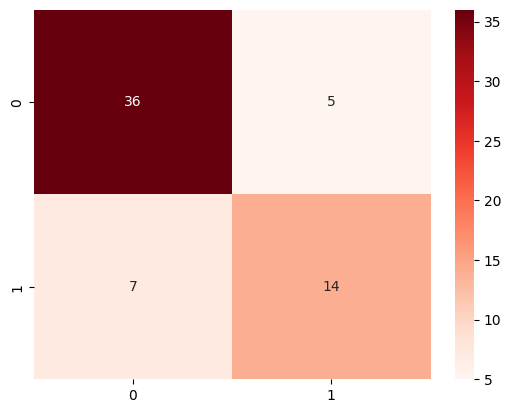

In [97]:
CM_SVM = confusion_matrix(Gtest, SVM_Pred)
print(CM_SVM)
sns.heatmap(CM_SVM, annot=True, cmap='Reds')
plt.show()

* Metrik Evaluasi
> Precision:

Rasio prediksi benar positif terhadap semua prediksi positif

Contoh: Precision 0.84 untuk kelas 0 berarti 84% prediksi kelas 0 benar

Contoh: Precision 0.74 untuk kelas 1 berarti 74% prediksi kelas 1 benar

> Recall (Sensitivity):

Rasio prediksi benar positif terhadap semua kasus aktual positif

Recall 0.88 untuk kelas 0 berarti model menangkap 88% dari semua kasus kelas 0 sebenarnya

Recall 0.67 untuk kelas 1 berarti model hanya menangkap 67% dari semua kasus kelas 1 sebenarnya

> F1-Score:

Rata-rata harmonik precision dan recall (2(precisionrecall)/(precision+recall))

F1 0.86 untuk kelas 0 menunjukkan keseimbangan baik antara precision dan recall

F1 0.70 untuk kelas 1 menunjukkan ketidakseimbangan antara precision (baik) dan recall (rendah)

> Accuracy:

Persentase prediksi yang benar secara keseluruhan

Pada data testing 80%, pada training 81%

> Macro Avg:

Rata-rata sederhana metrik untuk semua kelas

Macro avg F1 0.78 menunjukkan performa rata-rata kedua kelas

> Weighted Avg:

Rata-rata metrik yang diberi bobot berdasarkan jumlah sampel

Weighted avg F1 0.80 lebih mendekati performa kelas 0 karena jumlah sampel lebih banyak

* Analisis Hasil

1. Tidak ada Overfitting atau Underfitting dalam Accuracy

2. Perbandingan dengan Model Sebelumnya

akurasi testing

SVM: 80% 

CatBoost: 77%

Logistic Regression: 83%

akurasi training

SVM: 81%

CatBoost: 85%

Logistic Regression: 76%

Model ini menunjukkan model terbaik diantara ketiga model yang dibuat.

##### **e. Bandingkan hasil dari ketiga algortima tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi data anda dengan baik?**

* Ranking Performa:

``1. SVM (Terbaik)``

``2. Logistic Regression``

``3. CatBoost``

* Analisis Penyebab Performa:

1. SVM Unggul Karena:

_Kernel RBF berhasil menangkap pola non-linear dalam data._

_Maximized margin membuat generalisasi lebih baik._

_Parameter C=1 memberikan balance antara bias-variance._

2. Logistic Regression Performa Menengah Karena:

`Kelebihan:`

_Cepat dan interpretabel._

_Cocok untuk hubungan linear._

`Kekurangan:`

_Tidak bisa menangkap kompleksitas data non-linear._

3. CatBoost Paling Sederhana:

_Terlalu kompleks untuk dataset kecil, sehingga overfit._

_Hyperparameter kurang optimal (mungkin butuh lebih banyak eksperimen tuning)._

* Kesimpulan
SVM unggul karena mampu menangani non-linearitas tanpa overfitting.

Logistic Regression bagus untuk baseline model.

CatBoost kurang cocok untuk data kecil, tetapi bisa lebih baik dengan tuning.

* Rekomendasi:

Gunakan SVM untuk prediksi akhir.

Jika butuh interpretasi, pertimbangkan Logistic Regression.

Untuk data lebih besar, coba CatBoost dengan optimasi parameter.

#### ***4. Evaluasi*:**

##### **a. Berdasakan clasification report model terbaik, berapa nilai precission dan recall untuk prediksi penumpang yang "selamat"?**

[[36  5]
 [ 7 14]]


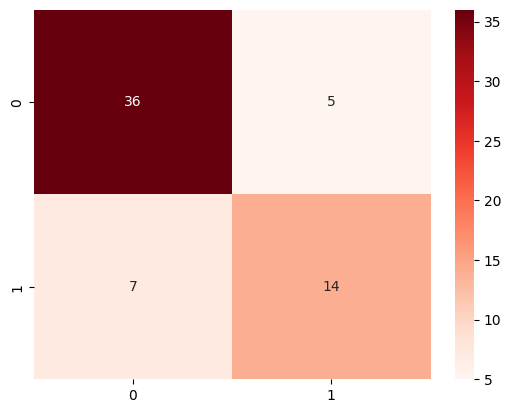

In [98]:
CM_SVM = confusion_matrix(Gtest, SVM_Pred)
print(CM_SVM)
sns.heatmap(CM_SVM, annot=True, cmap='Reds')
plt.show()

In [ ]:
print('classification Report untuk Grup Data Test : \n')
print(classification_report(Gtest, SVM_Pred), "\n\n")
print('Clasification Report untuk Grup Data Train: \n')
print(classification_report(Gtrain, SVM_pred_train), '\n\n')

classification Report untuk Grup Data Test : 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.74      0.67      0.70        21

    accuracy                           0.81        62
   macro avg       0.79      0.77      0.78        62
weighted avg       0.80      0.81      0.80        62
 


Clasification Report untuk Grup Data Train: 

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       350
           1       0.83      0.61      0.70       201

    accuracy                           0.81       551
   macro avg       0.82      0.77      0.78       551
weighted avg       0.82      0.81      0.81       551
 




* Precision (Data Test) = 0.74

Artinya: 74% dari prediksi "selamat" benar-benar selamat (26% salah prediksi).

Contoh: Jika model memprediksi 100 orang selamat, hanya 74 yang benar-benar selamat.

* Recall (Data Test) = 0.67

Artinya: Model berhasil mendeteksi 67% dari total penumpang selamat sebenarnya (33% tidak terdeteksi).

Contoh: Jika ada 100 penumpang selamat, model hanya mengenali 67 orang.

* Perbandingan Train vs Test:

Meskipun menghasilkan accuracy yang stabil dan tidak namun kita lihat dalam precission dan recall model terbaik pun masih Overfitting:

Precision kelas 1 turun dari 0.83 (train) ke 0.74 (test).

Recall stabil (0.61 vs 0.67), menunjukkan generalisasi cukup baik.
Evaluasi ulang feature engineering untuk pola keselamatan yang terlewat

##### **b. Berapa banyak penumpang yang diprediksi selamat dan berapa diantaranya benar-benar selamat?**

[[33  8]
 [ 5 16]]


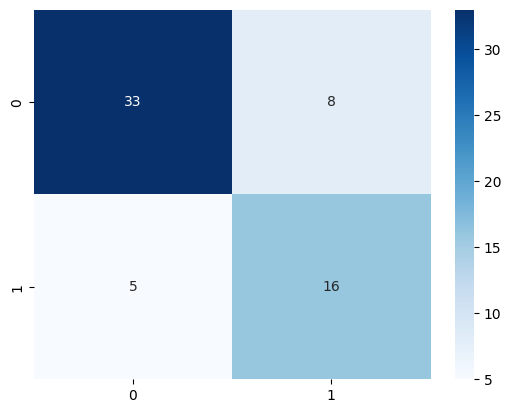

In [ ]:
CM_SVM = confusion_matrix(Gtest, SVM_Pred)
print(CM_SVM)
sns.heatmap(CM_SVM, annot=True, cmap='Reds')
plt.show()

 Jumlah penumpang yang diprediksi selamat: 19
 Di antaranya yang benar-benar selamat: 14


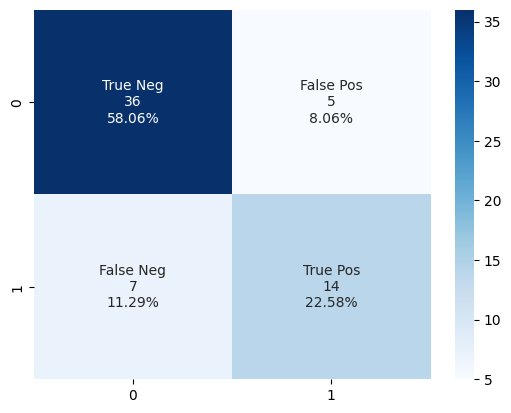

In [101]:
# Hitung confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                CM_SVM.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     CM_SVM.flatten()/np.sum(CM_SVM)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM_SVM, annot=labels, fmt='', cmap='Blues')

# Ekstrak nilai dari confusion matrix
true_negative, false_positif, false_negative, true_positive = CM_SVM.ravel()

# Jawaban pertanyaan (b)
total_predicted_survived = true_positive + false_positif  # Total diprediksi selamat
actual_survived_correctly_predicted = true_positive       # Benar-benar selamat (true positive)

print(f" Jumlah penumpang yang diprediksi selamat: {total_predicted_survived}")
print(f" Di antaranya yang benar-benar selamat: {actual_survived_correctly_predicted}")

* Prediksi Penumpang yang Selamat:
> Terdapat 19 penumpang yang diprediksi selamat (nilai positif).

* Penumpang yang Benar-Benar Selamat:
> Dari 19 penumpang yang diprediksi selamat, 14 di antaranya benar-benar selamat (true positive).
